C:\Users\Rhayven\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Confusion Matrix:
[[124   5  25]
 [ 34 107  97]
 [ 22  27 586]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.69      0.81      0.74       154
     Neutral       0.77      0.45      0.57       238
    Positive       0.83      0.92      0.87       635

    accuracy                           0.80      1027
   macro avg       0.76      0.73      0.73      1027
weighted avg       0.79      0.80      0.78      1027

Overall Accuracy: 0.80


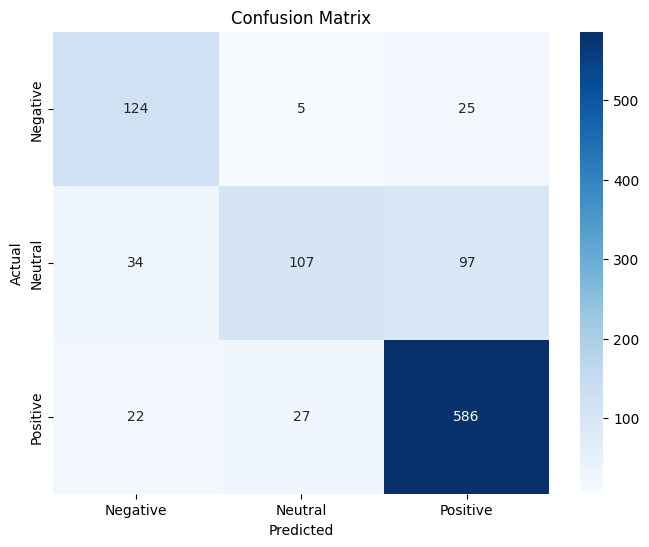

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Rhayven\Downloads\FB Loren Legarda_sentiment_improved.csv")

X = df['comment']
y = df['final_sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf_classifier, X_tfidf, y, cv=skf)

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y, y_pred))

accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [2]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
fold_accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.2f}")
    fold += 1

print(f"\nAverage Accuracy across 10 folds: {np.mean(fold_accuracies):.2f}")

Fold 1 Accuracy: 0.73
Fold 2 Accuracy: 0.80
Fold 3 Accuracy: 0.83
Fold 4 Accuracy: 0.82
Fold 5 Accuracy: 0.82
Fold 6 Accuracy: 0.81
Fold 7 Accuracy: 0.83
Fold 8 Accuracy: 0.79
Fold 9 Accuracy: 0.75
Fold 10 Accuracy: 0.78

Average Accuracy across 10 folds: 0.80
